## **Purpose**
 In this notebook we will explore another option for joining our VGchartz dataset with our Twitch dataset. We are going to see whether using the get_close_matches function, that we used in 500.ipynb would be a good method to use as some games may contain different slightly different game names.

## **Datasets**
400.csv, final_twitch.csv


In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sys

In [2]:
df2 = pd.read_csv('../data/raw/final_twitch.csv')
df=pd.read_csv('../data/prep/400.csv')

In the previous notebook we jooined the twitch data with the vg/mets dataset. We done this by joining them by name. In this notebook we are going to explore the idea of using a match function for joining the datasets instead. The reason for doing this is because some games may be stored under a slightly different name in one dataset than the other, for example a game might contain roman numerals in one dataset but contain the numeric figure in the other. 

In [4]:
name_list=df.name.tolist()
date_list=df.release_date.tolist()

We are going to use the get_close_match function. we set the cutoff quite high as .95 as a match should only occur if the game names are almost identicle.

In [44]:
import difflib
def find_it(w):
    return difflib.get_close_matches(w, df2.Game, n=100000, cutoff=.95)

In [45]:
l=[]
for i in name_list:
    l.append( find_it(i))

In [46]:
temp_df = pd.DataFrame()
column_values = pd.Series(name_list)
temp_df.insert(loc=0, column='name', value=column_values)

In [47]:
column_values = pd.Series(date_list)
temp_df.insert(loc=0, column='release_date', value=column_values)

In [48]:
column_values = pd.Series(l)
temp_df.insert(loc=0, column='Matched_Name', value=column_values)

In [49]:
mention_list=[]
for index, row in temp_df.iterrows():
    str1 = " ".join(str(x) for x in row['Matched_Name'])
    mention_list.append(str1)

In [50]:
temp_df['Matched_Name'] = mention_list
temp_df['Matched_Name'] = temp_df['Matched_Name'].replace('',np.nan)
temp_df.head(20)

,Matched_Name,release_date,name
0,.hack//G.U. Last Recode,2017-11-03,.hack//G.U. Last Recode
1,NaN,2003-02-11,.hack//Infection Part 1
2,007 Legends,2012-10-16,007 Legends
3,NaN,2000-11-20,007 Racing
4,NaN,2008-11-04,007: Quantum of Solace
5,007: The World is Not Enough,2000-11-06,007: The World is not Enough
6,1 vs. 100,2008-06-30,1 vs. 100
7,NaN,2001-11-14,18 Wheeler: American Pro Trucker
8,NaN,2005-08-23,187: Ride or Die
9,2002 FIFA World Cup,2002-04-22,2002 FIFA World Cup


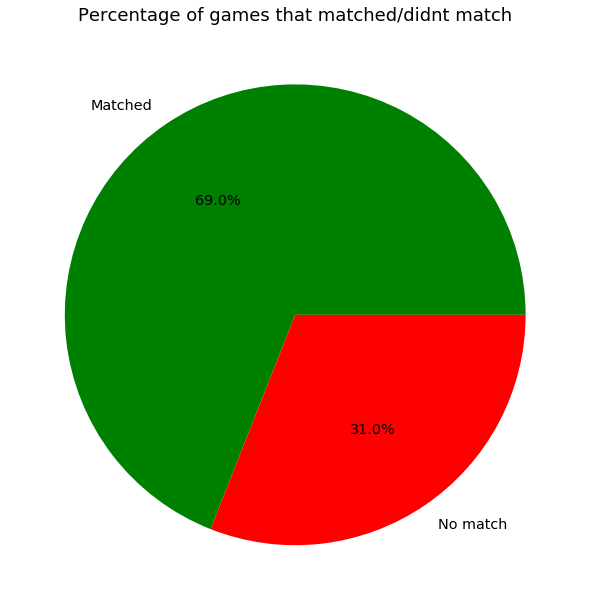

number of matched games: 4576
number of games that didnt match: 1418


In [100]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm

fig = plt.figure(1, figsize=(10,10))
ax = fig.add_axes([0.1, 0.1,0.8,0.8])
plt.title('Percentage of games that matched/didnt match',fontsize=18)

labels = 'Matched', 'No match'
colors= 'green','red'
y = temp_df['Matched_Name'].isnull().sum()
x = len(temp_df)
fracs = [x-y, y]

patches, texts, autotexts = ax.pie(fracs, labels=labels, colors=colors, autopct='%1.1f%%')

proptease = fm.FontProperties()
proptease.set_size('x-large')
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)

plt.show()

print('number of matched games:' ,x)
print('number of games that didnt match:' ,y)

As you can see 69% of the games in the vg/meta dataset matched with a game in the twitch dataset.

Using the match function we only found a match for 2 more games then if we just joined by name. I have a feeling that these two games shouldnt match either and only did match because they have a very similar name.